# BANK CUSTOMER CHURN PREDICTION

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### LOADING THE DATA INTO DATAFRAME FROM CSV

In [46]:
df = pd.read_csv('customer_data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


#### CHECKING FOR MISSING VALUES

In [47]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [49]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


#### SHAPE OF THE DATAFRAME

In [50]:
df.shape

(10000, 18)

In [51]:
# BEFORE STARTING, let us get max values for required columns(bank specific not user specific) which will be useful later on for eda
print(f"""Number of Products: {df['NumOfProducts'].unique()}
Max Credit Score : {df['CreditScore'].max()}
Max Points Earned: {df['Point Earned'].max()}""")

Number of Products: [1 3 2 4]
Max Credit Score : 850
Max Points Earned: 1000


### <b>EXPLORATORY DATA ANALYSIS</b>

#### <b> GENERAL EDA QUESTIONS</b>

##### <i>1. Which existing customer has the highest bank balance ?</i>

In [52]:
df[df.Balance == df.query('Exited== 0')["Balance"].max()][['CustomerId','Surname','Balance','Exited']]

,CustomerId,Surname,Balance,Exited
3588,15571958,McIntosh,221532.8,0


##### INFERENCE
* Existing Customer with last name McIntosh having customer id 15571958 had the highest bank balance

##### <i>2. Which customer had the highest bank balance ? </i>

In [53]:
df[df["Balance"]==df['Balance'].max()][['CustomerId','Surname','Balance','Exited']]

,CustomerId,Surname,Balance,Exited
2092,15757408,Lo,250898.09,1


##### INFERENCE
* Exited Customer with last name Lo having customer id 15757408 had the highest bank balance

##### <i>3. Which customer has the highest estimated salary ?</i>

In [54]:
df[df.EstimatedSalary == df.EstimatedSalary.max()][['CustomerId','Surname','Balance','Exited','EstimatedSalary']]

,CustomerId,Surname,Balance,Exited,EstimatedSalary
6646,15662021,Lucciano,0.0,0,199992.48


##### INFERENCE
* Existing Customer with last name Lucciano having customer id 15662021 had the highest estimated salary.

##### <i>4. Which existing customer(s) was an active member and had earned the highest number of points ?</i>

In [55]:
df[(df["Point Earned"] == 1000) & (df["Exited"] == 0) & (df["IsActiveMember"] == 1)][['CustomerId','Surname','IsActiveMember','Exited','Point Earned']]

,CustomerId,Surname,IsActiveMember,Exited,Point Earned
1249,15803681,Sims,1,0,1000
2011,15726267,Paterson,1,0,1000
2664,15769582,Kang,1,0,1000
2876,15585284,Thomson,1,0,1000
4271,15707132,Yudin,1,0,1000
6778,15613463,Hackett,1,0,1000
8508,15616833,Wang,1,0,1000
9224,15667944,Onuchukwu,1,0,1000


#### INFERENCE
* A total of 8 active customers had earned the highest 1000 points.

##### <i>5. Which existing customer(s) was an active member and had been using the highest no of products ?</i>

In [56]:
# highest numof products is 3 in case of existing customers and 4 in case of all customers
df[(df["NumOfProducts"] == 3) & (df["Exited"] == 0) & (df["IsActiveMember"] == 1)][['CustomerId','Surname','IsActiveMember','Exited','NumOfProducts']]

,CustomerId,Surname,IsActiveMember,Exited,NumOfProducts
549,15600651,Ijendu,1,0,3
569,15706647,Jordan,1,0,3
727,15767432,Ts'ai,1,0,3
934,15790299,Williamson,1,0,3
995,15810218,Sun,1,0,3
1614,15646037,Sopuluchi,1,0,3
2210,15769917,Onyekachi,1,0,3
2421,15574842,Lorenzo,1,0,3
2812,15581620,Franklin,1,0,3
3062,15697574,Stewart,1,0,3


#### INFERENCE
* A total of 28 existing customers had been an active member and used highest 3 different products.

##### <i>6. Which existing customer(s) has the highest tenure ?</i>

In [57]:
df[(df['Tenure'] == df['Tenure'].max()) & (df['Exited']==0)][['CustomerId','Surname','IsActiveMember','Exited','Tenure']]

,CustomerId,Surname,IsActiveMember,Exited,Tenure
12,15632264,Kay,0,0,10
50,15616550,Chidiebele,0,0,10
67,15641582,Chibugo,1,0,10
79,15803136,Postle,0,0,10
85,15805254,Ndukaku,1,0,10
...,...,...,...,...,...
9904,15722532,Angelo,1,0,10
9907,15611247,McKenzie,0,0,10
9945,15674000,Cattaneo,1,0,10
9950,15638494,Salinas,1,0,10


#### INFERENCE
* A total of 389 existing customers have a tenure of 10 years, meaning they have stayed for the longest time with the bank

#### <b>GRAPHICAL EDA QUESTIONS</b>

##### <i>1. Is there any relation of gender with churn ? If so, visualize using any chart</i>

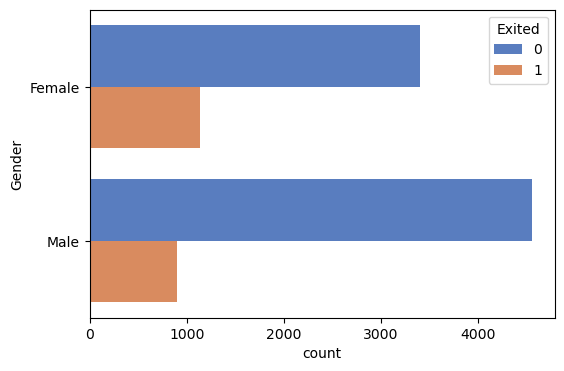

In [58]:
plt.figure(figsize=(6,4))
sns.countplot(y="Gender", data=df, palette='muted', hue='Exited')
plt.show()

##### INFERENCE
* Although there are significantly more males than females who have bank accounts, but the females who exited are slightly more than the males who exited.<br>
* Nothing concrete can be said on how to control the churn just from this data but still the bank can focus on female customers user experience <br>to keep them as active users.

##### <i>2. Does having complain result in exit by the user ? If so, visualize using any chart</i>

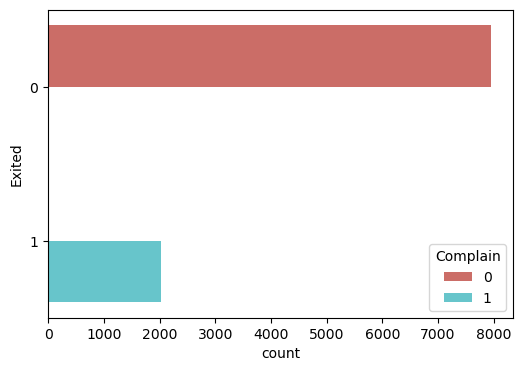

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(y="Exited", data=df, palette='hls', hue='Complain')
plt.show()

#### INFERENCE
* Having a complain has direct effect on exiting of the user.<br>
* It is evident from the graph that all users who exited had complaint with the bank services.<br>
* To reduce churn, the bank should focus on solving complaints of the user whenever they have one.<br>
* The complain data can be used for predicting churn rate in the ML model we are going to make as not every column will directly correlate to exiting.

##### <i>3. Is there any relation of tenure with churn ? If so, visualize using any chart</i>

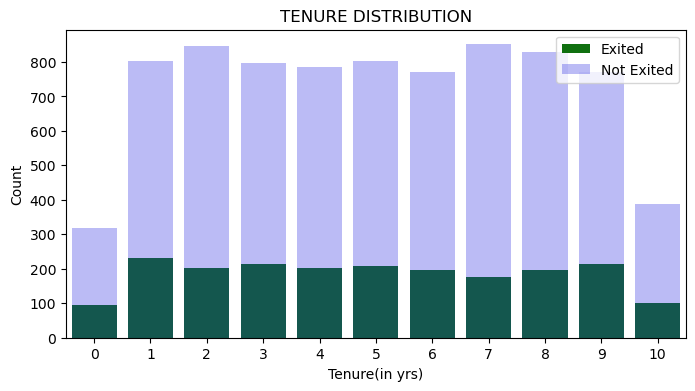

In [60]:
plt.figure(figsize=(8,4))
x1_values = df[df['Exited'] == 1]['Tenure'].value_counts().index
y1_values = df[df['Exited'] == 1]['Tenure'].value_counts().values
x2_values = df[df['Exited'] == 0]['Tenure'].value_counts().index
y2_values = df[df['Exited'] == 0]['Tenure'].value_counts().values

data1 = pd.DataFrame({'Tenure': x1_values, 'Counts': y1_values})
data2 = pd.DataFrame({'Tenure': x2_values, 'Counts': y2_values})

sns.barplot(x = x1_values, y = y1_values, data=data1, color='green', label = 'Exited')
sns.barplot(x = x2_values, y = y2_values, data=data2,color='blue', label = "Not Exited",alpha = 0.3)
plt.xlabel("Tenure(in yrs)")
plt.ylabel("Count")
plt.title("TENURE DISTRIBUTION")
plt.legend()
plt.show()

##### INFERENCE
* As such, there appears to be no correlation of tenure with churn.
* The churn appears to be pretty evenly spreadout throughout the various tenures.

##### <i>4. Is there any relation of Geography with churn ? If so, visualize using any chart</i>

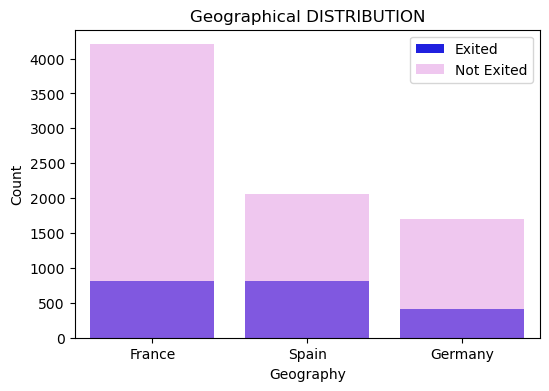

In [61]:
plt.figure(figsize=(6,4))
x1_values = df[df['Exited'] == 1]['Geography'].value_counts().index
y1_values = df[df['Exited'] == 1]['Geography'].value_counts().values
x2_values = df[df['Exited'] == 0]['Geography'].value_counts().index
y2_values = df[df['Exited'] == 0]['Geography'].value_counts().values

data1 = pd.DataFrame({'Tenure': x1_values, 'Counts': y1_values})
data2 = pd.DataFrame({'Tenure': x2_values, 'Counts': y2_values})

sns.barplot(x = x1_values , y = y1_values, data = data1, color = 'blue', label = 'Exited')
sns.barplot(x = x2_values, y = y2_values, data=data2, alpha = 0.5, color = 'violet', label = 'Not Exited')
plt.xlabel("Geography")
plt.ylabel("Count")
plt.title("Geographical DISTRIBUTION")
plt.legend()
plt.show()

##### INFERENCE
* There does not appear to be significant correlation between geography and churn as it is pretty uniform, although  
germany appears to have less churn than others.

##### <i>5. Is there any relation of Balance with churn ? If so, visualize using any chart</i>

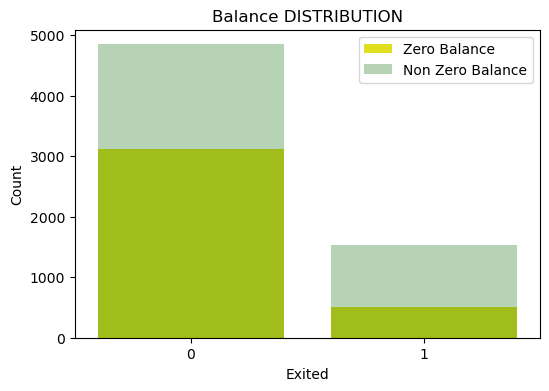

In [62]:
plt.figure(figsize=(6,4))
x1_values = df[df['Balance'] == 0]['Exited'].value_counts().index
y1_values = df[df['Balance'] == 0]['Exited'].value_counts().values
x2_values = df[df['Balance'] != 0]['Exited'].value_counts().index
y2_values = df[df['Balance'] != 0]['Exited'].value_counts().values

data1 = pd.DataFrame({'Exited': x1_values, 'Counts': y1_values})
data2 = pd.DataFrame({'Exited': x2_values, 'Counts': y2_values})

sns.barplot(x = x1_values, y = y1_values, data=data1, label = 'Zero Balance', color= 'yellow',)
sns.barplot(x = x2_values, y = y2_values, data=data2, label = 'Non Zero Balance', color = 'green', alpha = 0.3)
plt.xlabel("Exited")
plt.ylabel("Count")
plt.title("Balance DISTRIBUTION")
plt.legend()
plt.show()

##### INFERENCE
* There are a total of approx 500+1500 = 2000 who have exited the bank
* Only 500,i.e, 25% of them had zero balance account while the rest 75% had non zero balance accounts
* Still, a majority of customers have zero balance accounts in the bank, approx 3000 of them. The bank should focus on incentivising customers to increase their savings amount in the bank as less liquidity will means the bank can give less loans that it should to keep credit-debit equal.

##### <i>6. Is there any relation of Credit Score with churn ? If so, visualize using any chart</i>

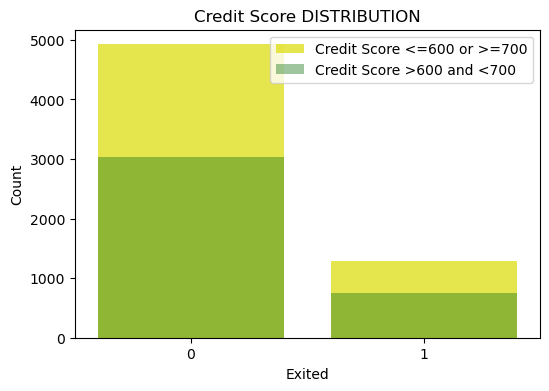

In [63]:
plt.figure(figsize=(6,4))
x1_values = df[(df['CreditScore'] <= 600) | (df['CreditScore'] >= 700)]['Exited'].value_counts().index
y1_values = df[(df['CreditScore'] <= 600) | (df['CreditScore'] >= 700)]['Exited'].value_counts().values
x2_values = df[(df['CreditScore'] > 600) & (df['CreditScore'] < 700)]['Exited'].value_counts().index
y2_values = df[(df['CreditScore'] > 600) & (df['CreditScore'] < 700)]['Exited'].value_counts().values

data1 = pd.DataFrame({'Exited': x1_values, 'Counts': y1_values})
data2 = pd.DataFrame({'Exited': x2_values, 'Counts': y2_values})

sns.barplot(x = x1_values, y = y1_values, data=data1, label = 'Credit Score <=600 or >=700', color= 'yellow', alpha = 0.8)
sns.barplot(x = x2_values, y = y2_values, data=data2, label = 'Credit Score >600 and <700', color = 'green', alpha = 0.4)
plt.xlabel("Exited")
plt.ylabel("Count")
plt.title("Credit Score DISTRIBUTION")
plt.legend()
plt.show()

##### INFERENCE
* As such, there does not appear to be any major difference between the segmented users as almost an equal % of them have exited the bank.

##### <i>7. What is the actual churn rate ? Visualize using any chart</i>

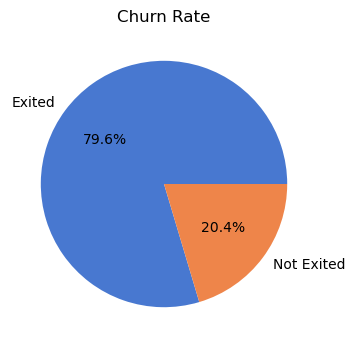

In [64]:
plt.figure(figsize=(6,4))
colors = sns.color_palette('muted')
plt.pie(df["Exited"].value_counts().values, labels =['Exited','Not Exited'], colors = colors, autopct='%1.1f%%')
plt.title("Churn Rate")
plt.show()

##### INFERENCE
* The churn rate is 20% which is considerably high.  
* The bank should focus on reducing churn as much as possible.

##### <i>8. What is the general distribution of customers by age ? Visualize using any chart</i>

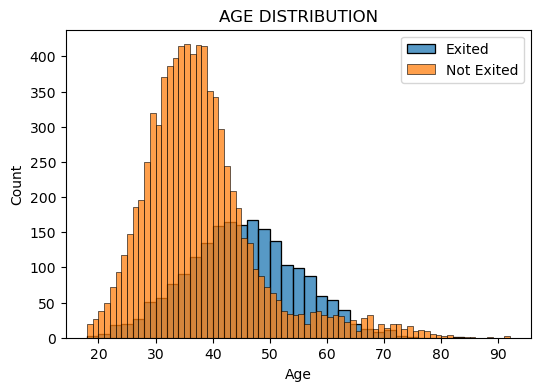

In [65]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"][df['Exited']==1], label = "Exited" )
sns.histplot(df["Age"][df['Exited']==0], label = 'Not Exited')
plt.title('AGE DISTRIBUTION')
plt.legend()
plt.show()

##### INFERENCE
* The age is normally distributed in both exited and not exited cases
* It can be observed that more customers in age group 45-70 choose to exit than to stay

##### <i>9. What is the churn for different satisfaction score ? Visualize using any chart</i>

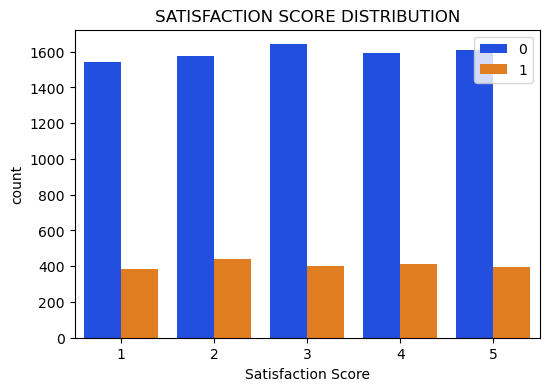

In [66]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'Satisfaction Score', hue='Exited', data = df , palette='bright')
plt.title("SATISFACTION SCORE DISTRIBUTION")
plt.legend()
plt.show()

#### INFERENCE
* It does not have much use as churn is almost same for all the satisfaction scores.
* Still, we need to use it in our model as it can somewhat increase the accuracy of it.

##### <i>10. What is the churn for active customers vs inactive customers ? Visualize using any chart</i>

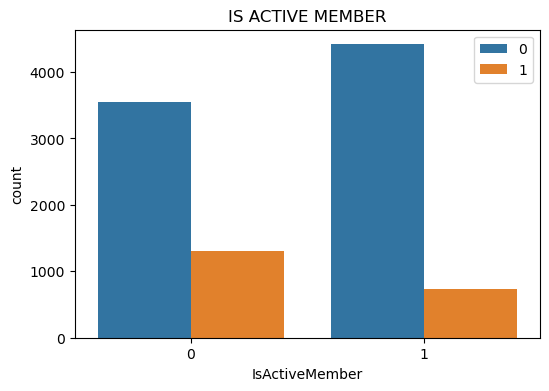

In [67]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'IsActiveMember', hue='Exited', data=df)
plt.title("IS ACTIVE MEMBER")
plt.legend()
plt.show()

#### INFERENCE
* For non active customers, the exit rate is almost double than that for active customers.

##### <i>11. Show all the correlations between feature columns using a heatmap </i>

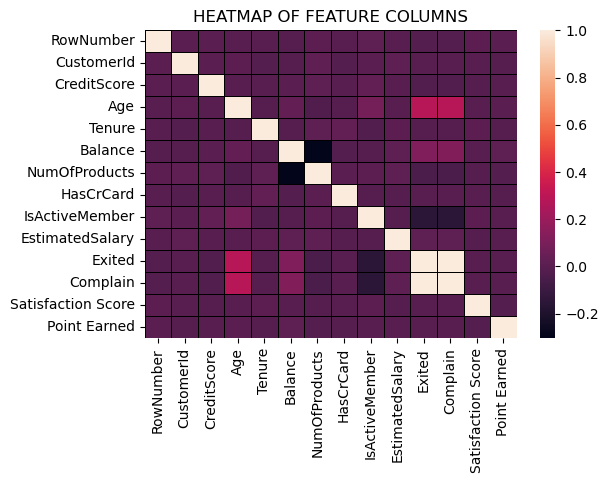

In [68]:
plt.figure(figsize=(6,4))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, linecolor='black',linewidths=0.5)
plt.title("HEATMAP OF FEATURE COLUMNS")
plt.show()

#### INFERENCE
* As we can see, exited and complain have direct correlation
* There is some correlation between other feature columns and exited but not on a scale like complain

### <b> END OF EDA</b>
# <b>BEGINNING WITH ML MODEL FOR CHURN PREDICTION</b>
### 1. DATA PREPOCESSING

* It will include cleaning(if na present) of data as we are only only sklearn, not tensorflow which can  deal with na values automatically
* Converting categorical columns to numerical columns
* Dropping useless columns
* Selecting feature columns for ML model
* Scaling the data 
* Splitting data into train and test datasets
* Oversampling the training data so that the model sees equal exits and not exits while training

In [69]:
# converting categorical columns into numerical columns
df['Gender'] = (df['Gender'] == 'Male').astype(int)
df['Geography'].replace(['France','Spain','Germany'],[1,2,3], inplace=True)
df['Card Type'].replace(['SILVER', 'GOLD', 'DIAMOND', 'PLATINUM'],[1,2,3,4], inplace=True)

# drop useless columns
df.drop(columns=['CustomerId','Surname','RowNumber'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,1,0,42,2,0.00,1,1,1,101348.88,1,1,2,3,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,3,456
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1,1,3,3,377
3,699,1,0,39,1,0.00,2,0,0,93826.63,0,0,5,2,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,2,425


In [70]:
# importing necessary libraries
# here we use only classifier models as we need either 1 or 0 in output and not predict a random number
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [71]:
# selecting useful columns
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
            'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Complain', 'Satisfaction Score','Card Type','Point Earned']
X = df[features]
y= df['Exited']

# scaling the data as balance and estimatedsalary are way too large and can significantly affect the training of the model
scaler = StandardScaler()
X = scaler.fit_transform(X)

# splliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# oversampling the training data as it has only 2000*0.7 = 1400 exited cases against 8000*0.7 = 5600 non exited cases
ros = RandomOverSampler()
X_train,y_train = ros.fit_resample(X_train, y_train)

# checking if exited and not exited cases are equal after oversampling
y_train.value_counts()

0    5568
1    5568
Name: Exited, dtype: int64

### 2. CREATING DATA PIPELINES FOR DIFFERENT MODELS

#### STEPS:
* Initialising a data pipeline
* Creating parameter grids for all models that are going to be used
* Creating a list of scoring methods
* Initialising GRIDSEARCHCV with pipeline, parameter grid, scoring methods
* Fitting the grid on training data
* Finding the best model and parameters
* Predicting on the testing data using the best model

In [ ]:
pipe = Pipeline([
    ('model', None)
])

param_grid_rf = {
    'model': [RandomForestClassifier()],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2'],
    'model__bootstrap': [True, False]
}

param_grid_knn = {
    'model': [KNeighborsClassifier()],
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__leaf_size': [30, 40, 50]
}

param_grid_svc = {
    'model': [SVC()],
    'model__C': [1.0, 10.0, 100.0],
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'model__degree': [2, 3, 4],
    'model__gamma': ['scale', 'auto'],
    'model__class_weight': [None, 'balanced']
}
param_grid_dt = {
    'model': [DecisionTreeClassifier()],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2'],
    'model__criterion': ['gini', 'entropy']
}

param_grid_nb = {
    'model': [GaussianNB()]
}

param_grid_lr = {
    'model': [LogisticRegression()],
    'model__C': [0.1, 1.0, 10.0],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga'],
    'model__max_iter': [100, 200, 300]
}

param_grid = [param_grid_rf, param_grid_knn, param_grid_svc, param_grid_dt, param_grid_nb, param_grid_lr]
score = ['accuracy', 'precision', 'recall', 'f1']

grid_search = GridSearchCV(pipe, param_grid, cv =5, scoring=score, refit='accuracy')

grid_search.fit(X_train, y_train)

In [78]:
print("Best Parameters:", grid_search.best_params_)

# Print the best score found during grid search
print("Best Score:", grid_search.best_score_)

Best Parameters: {'model': RandomForestClassifier(), 'model__bootstrap': True, 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best Score: 0.9993714322106932


## 3. PREDICTING USING THE BEST MODEL

In [82]:
y_pred = grid_search.predict(X_test)
print(f"Accuracy of the Model is: {accuracy_score(y_test, y_pred)*100} %")

Accuracy of the Model is: 99.8 %


#### RESULTS
* We have trained a machine learning model for churn prediction on bank customer data with a model accuracy of 99.8 %.